In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
anime = pd.read_csv('../data/anime.csv')
rating = pd.read_csv('../data/rating.csv')

In [2]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [4]:
anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [5]:
rating.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [6]:
rating.rating.value_counts()

 8     1646019
-1     1476496
 7     1375287
 9     1254096
 10     955715
 6      637775
 5      282806
 4      104291
 3       41453
 2       23150
 1       16649
Name: rating, dtype: int64

In [7]:
rating = rating[rating["rating"] != -1]

In [8]:
print(f"anime.csv - rows: {anime.shape[0]}, columns: {anime.shape[1]}")
print(f"rating.csv - rows: {rating.shape[0]}, columns: {rating.shape[1]}")

anime.csv - rows: 12294, columns: 7
rating.csv - rows: 6337241, columns: 3


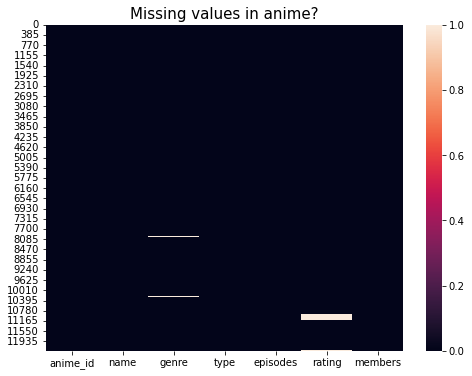

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(anime.isnull())
plt.title("Missing values in anime?", fontsize = 15)
plt.show()

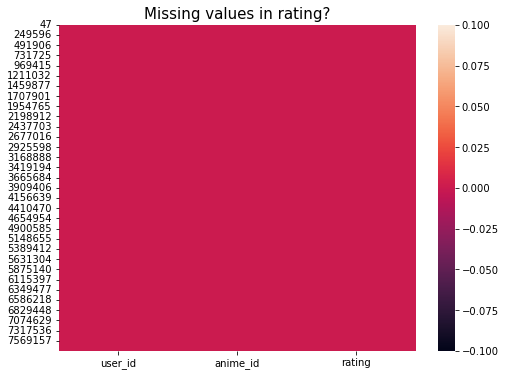

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(rating.isnull())
plt.title("Missing values in rating?", fontsize = 15)
plt.show()

In [11]:
df = pd.merge(rating,anime[["anime_id","name"]], left_on = "anime_id", right_on = "anime_id").drop("anime_id", axis = 1)
df.head()

,user_id,rating,name
0,1,10,Highschool of the Dead
1,3,6,Highschool of the Dead
2,5,2,Highschool of the Dead
3,12,6,Highschool of the Dead
4,14,6,Highschool of the Dead


In [12]:
count_rating = df.groupby("name")["rating"].count().sort_values(ascending = False)
count_rating

name
Death Note                         34226
Sword Art Online                   26310
Shingeki no Kyojin                 25290
Code Geass: Hangyaku no Lelouch    24126
Angel Beats!                       23565
                                   ...  
La Primavera                           1
Chou Zenmairobo: Patrasche             1
Ushi Atama                             1
Gun-dou Musashi Recap                  1
Futago no Ookami Daibouken             1
Name: rating, Length: 9926, dtype: int64

In [13]:
r = 5000
more_than_r_ratings = count_rating[count_rating.apply(lambda x: x >= r)].index

# Keep only the animes with at least r ratings in the DataFrame
df_r = df[df['name'].apply(lambda x: x in more_than_r_ratings)]

In [14]:
before = len(df.name.unique())
after = len(df_r.name.unique())
rows_before = df.shape[0]
rows_after = df_r.shape[0]
print(f'''There are {before} animes in the dataset before filtering and {after} animes after the filtering.

{before} animes => {after} animes
{rows_before} rows before filtering => {rows_after} rows after filtering''')

There are 9926 animes in the dataset before filtering and 279 animes after the filtering.

9926 animes => 279 animes
6337239 rows before filtering => 2517097 rows after filtering


In [15]:
df_recom = df_r.pivot_table(index='user_id',columns='name',values='rating')
df_recom.iloc[:5,:5]

name,Accel World,Afro Samurai,Air,Air Gear,Akame ga Kill!
user_id,,,,,
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,7.0,6.0,NaN,NaN,8.0
5,3.0,NaN,NaN,NaN,4.0
7,8.0,NaN,NaN,NaN,NaN


In [16]:
df_r.name.value_counts().head(10)

Death Note                            34226
Sword Art Online                      26310
Shingeki no Kyojin                    25290
Code Geass: Hangyaku no Lelouch       24126
Angel Beats!                          23565
Elfen Lied                            23528
Naruto                                22071
Fullmetal Alchemist: Brotherhood      21494
Fullmetal Alchemist                   21332
Code Geass: Hangyaku no Lelouch R2    21124
Name: name, dtype: int64

In [17]:
df_recom.to_pickle("../models/df.zip", compression='zip')

In [18]:
new_df= pd.read_pickle("../models/df.zip")
new_df.head()

name,Accel World,Afro Samurai,Air,Air Gear,Akame ga Kill!,Akira,Aldnoah.Zero,Amagi Brilliant Park,Angel Beats!,Angel Beats!: Another Epilogue,...,Yahari Ore no Seishun Love Comedy wa Machigatteiru.,Yahari Ore no Seishun Love Comedy wa Machigatteiru. Zoku,"Yosuga no Sora: In Solitude, Where We Are Least Alone.",Yuu☆Yuu☆Hakusho,Zankyou no Terror,Zero no Tsukaima,Zero no Tsukaima F,Zero no Tsukaima: Futatsuki no Kishi,Zero no Tsukaima: Princesses no Rondo,Zetsuen no Tempest
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.0,6.0,NaN,NaN,8.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
5,3.0,NaN,NaN,NaN,4.0,8.0,NaN,6.0,3.0,NaN,...,3.0,4.0,NaN,7.0,NaN,1.0,1.0,1.0,1.0,NaN
7,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
def find_corr(df, name):
    '''
    Get the correlation of one anime with the others
    
    Args
        df (DataFrame):  with user_id as rows and movie titles as column and ratings as values
        name (str): Name of the anime
    
    Return
        DataFrame with the correlation of the anime with all others
    '''
    
    similar_to_movie = df.corrwith(df[name])
    similar_to_movie = pd.DataFrame(similar_to_movie,columns=['Correlation'])
    similar_to_movie = similar_to_movie.sort_values(by = 'Correlation', ascending = False)
    return similar_to_movie

In [22]:
anime1 = 'Neon Genesis Evangelion'

# Recommendations
find_corr(df_recom, anime1).head(10)

,Correlation
name,
Neon Genesis Evangelion,1.000000
Neon Genesis Evangelion: The End of Evangelion,0.729849
Evangelion: 1.0 You Are (Not) Alone,0.486733
Evangelion: 2.0 You Can (Not) Advance,0.383645
Serial Experiments Lain,0.342767
Akira,0.321449
FLCL,0.302205
Ghost in the Shell,0.298103
Cowboy Bebop,0.275311


In [23]:
# Not recommended
find_corr(df_recom, anime1).tail(10)

,Correlation
name,
Re:Zero kara Hajimeru Isekai Seikatsu,0.046973
Boku dake ga Inai Machi,0.041217
Overlord,0.039032
Owari no Seraph,0.038908
Noragami Aragoto,0.035892
Sword Art Online II,0.035301
No Game No Life,0.034658
Dungeon ni Deai wo Motomeru no wa Machigatteiru Darou ka,0.021780
Sword Art Online,0.018262
